In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simpy
import random

from movement_model import Player, States, PlayGround
# ffmpeg -r 5 -i im.%03d.png -pix_fmt yuv420p walk.mp4

### Модель переходов

**Состояния модели:**
- $A_1 - $ Обе ноги игрока находятся на игровом поле.
- $A_2 - $ Лева нога игрока находится на игровом поле, правая нога - в воздухе.
- $A_3 - $ Правая нога игрока находится на игровом поле, левая нога - в воздухе.
- $A_4 - $ Обе ноги игрока находятся в воздухе.


**Ивенты модели:**

- $e_0 - $ Нахождение в том-же состоянии.
- $e_1 - $ Отрыв левой ноги игроком от игрового поля.
- $e_2 - $ Отрыв правой ноги игроком от игрового поля.
- $e_3 - $ Одновременный отрыв обеих ног игроком от игрового поля.
- $e_4 - $ Постановка левой ноги игроком на игровое поле.
- $e_5 - $ Постановка правой ноги игроком на игровое поле.
- $e_6 - $ Постановка обеих ног игроком на игровое поле.


<img src='https://drive.google.com/uc?id=1SlshEJV3n3K2Lf-Bm42U-2v9C2sXGXPO' width = "540" height = "540" alt = "пример">

### Моделирование движения игрока

In [4]:
def simulation(env, player):
    while True:
        yield env.process(player.select_state())

In [5]:
env = simpy.Environment()
player = Player(env, 1, 2) # env, team, num
env.process(simulation(env, player))
env.run(until=35)

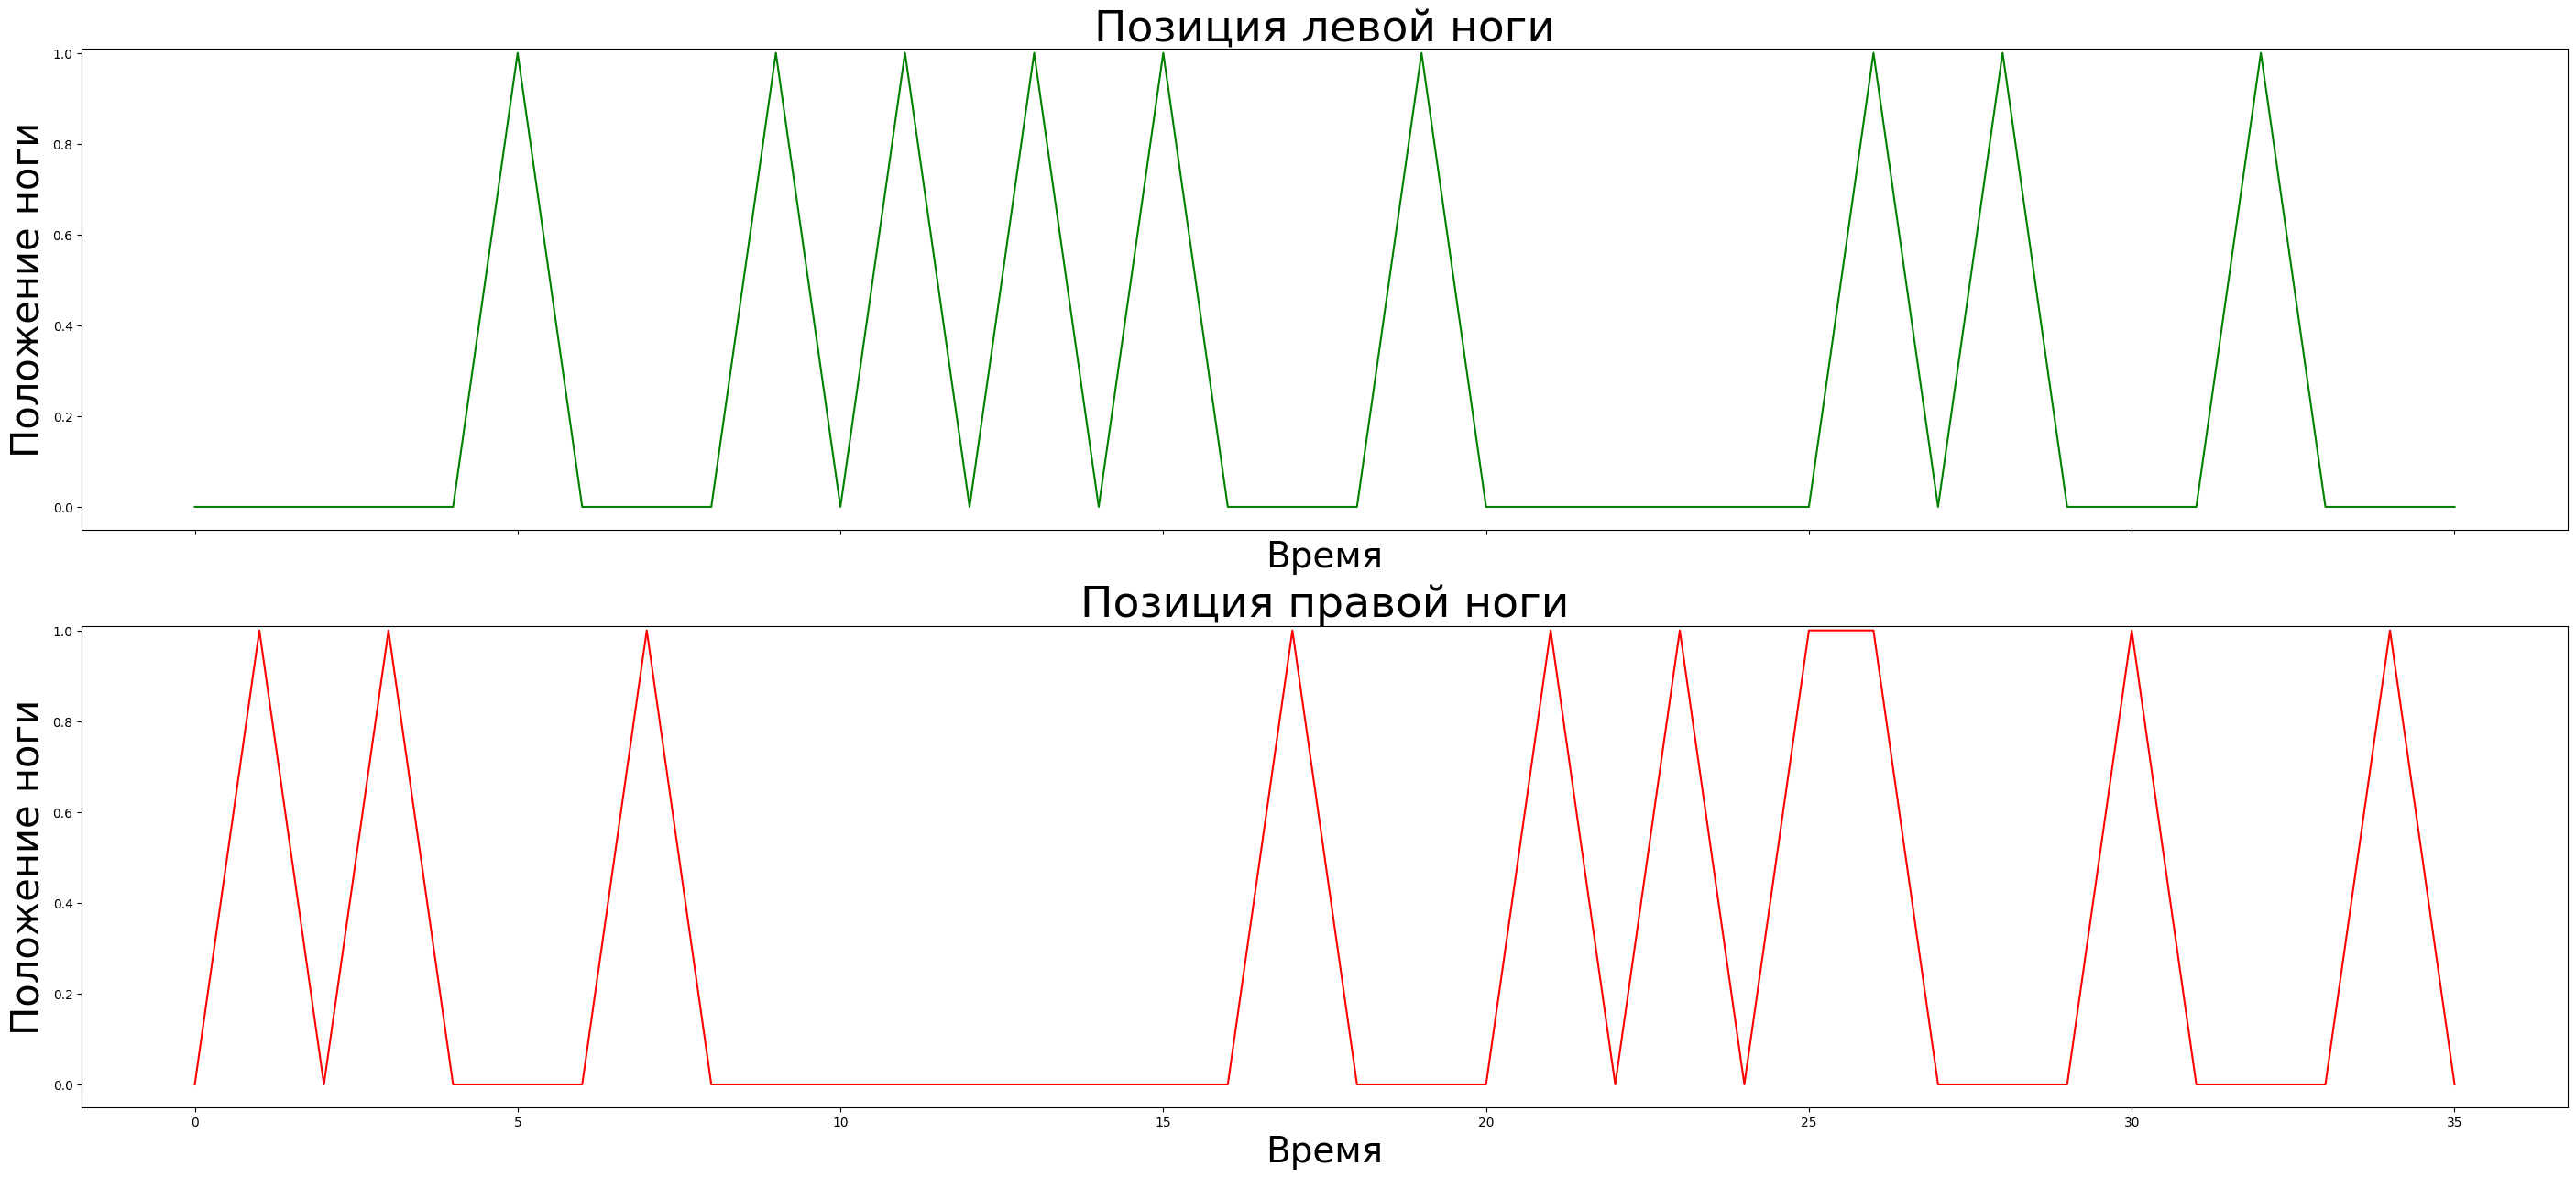

In [18]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(35, 15))
#fig.suptitle('Позиции обеих ног', fontsize = 52)
axes[0].plot(player.cond_left, color='green')
axes[0].set_title("Позиция левой ноги", fontsize=34)
axes[0].set_ylim(top=1.01)
axes[0].set_xlabel("Время", fontsize=28)
axes[0].set_ylabel("Положение ноги", fontsize=30)

axes[1].plot(player.cond_right, color='red')
axes[1].set_title("Позиция правой ноги", fontsize=34)
axes[1].set_ylim(top=1.01)
axes[1].set_xlabel("Время", fontsize=28)
axes[1].set_ylabel("Положение ноги", fontsize=30)

plt.savefig('positions.png')

In [22]:
df_l = []
df_r = []

df_left_x = []
df_left_y = []
df_right_x = []
df_right_y = []

for i in range(20):
    env = simpy.Environment()
    player = Player(env, 1, 2) # env, team, num
    env.process(simulation(env, player))
    env.run(until=50)
    
    df_l.append(player.cond_left)
    df_r.append(player.cond_right)
    
    df_left_x.append(player.left_x)
    df_left_y.append(player.left_y)
    df_right_x.append(player.right_x)
    df_right_y.append(player.right_y)

data_l = pd.DataFrame(df_l, columns = np.arange(51)) 
data_r = pd.DataFrame(df_r, columns = np.arange(51)) 

### Проанализируем полученные данные

In [23]:
data_l.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,1,1,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,0,0,0,1,1,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
3,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,1,1,1,1,0,0
4,0,0,0,1,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,0,1


In [24]:
data_r.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0,1,1,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
3,0,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
4,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [25]:
data_l.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,20.0,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.0,0.35000,0.150000,0.500000,0.400000,0.35000,0.200000,0.35000,0.250000,0.300000,...,0.400000,0.300000,0.450000,0.35000,0.400000,0.450000,0.600000,0.200000,0.250000,0.250000
std,0.0,0.48936,0.366348,0.512989,0.502625,0.48936,0.410391,0.48936,0.444262,0.470162,...,0.502625,0.470162,0.510418,0.48936,0.502625,0.510418,0.502625,0.410391,0.444262,0.444262
min,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.00000,0.000000,0.500000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.0,1.00000,0.000000,1.000000,1.000000,1.00000,0.000000,1.00000,0.250000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.250000,0.250000
max,0.0,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Приближение

In [26]:
left_pos = []
right_pos = []
for x in range(51):
    left_pos.append(data_l[x].value_counts().to_frame().index[0])
    right_pos.append(data_r[x].value_counts().to_frame().index[0])

(-0.05, 1.01)

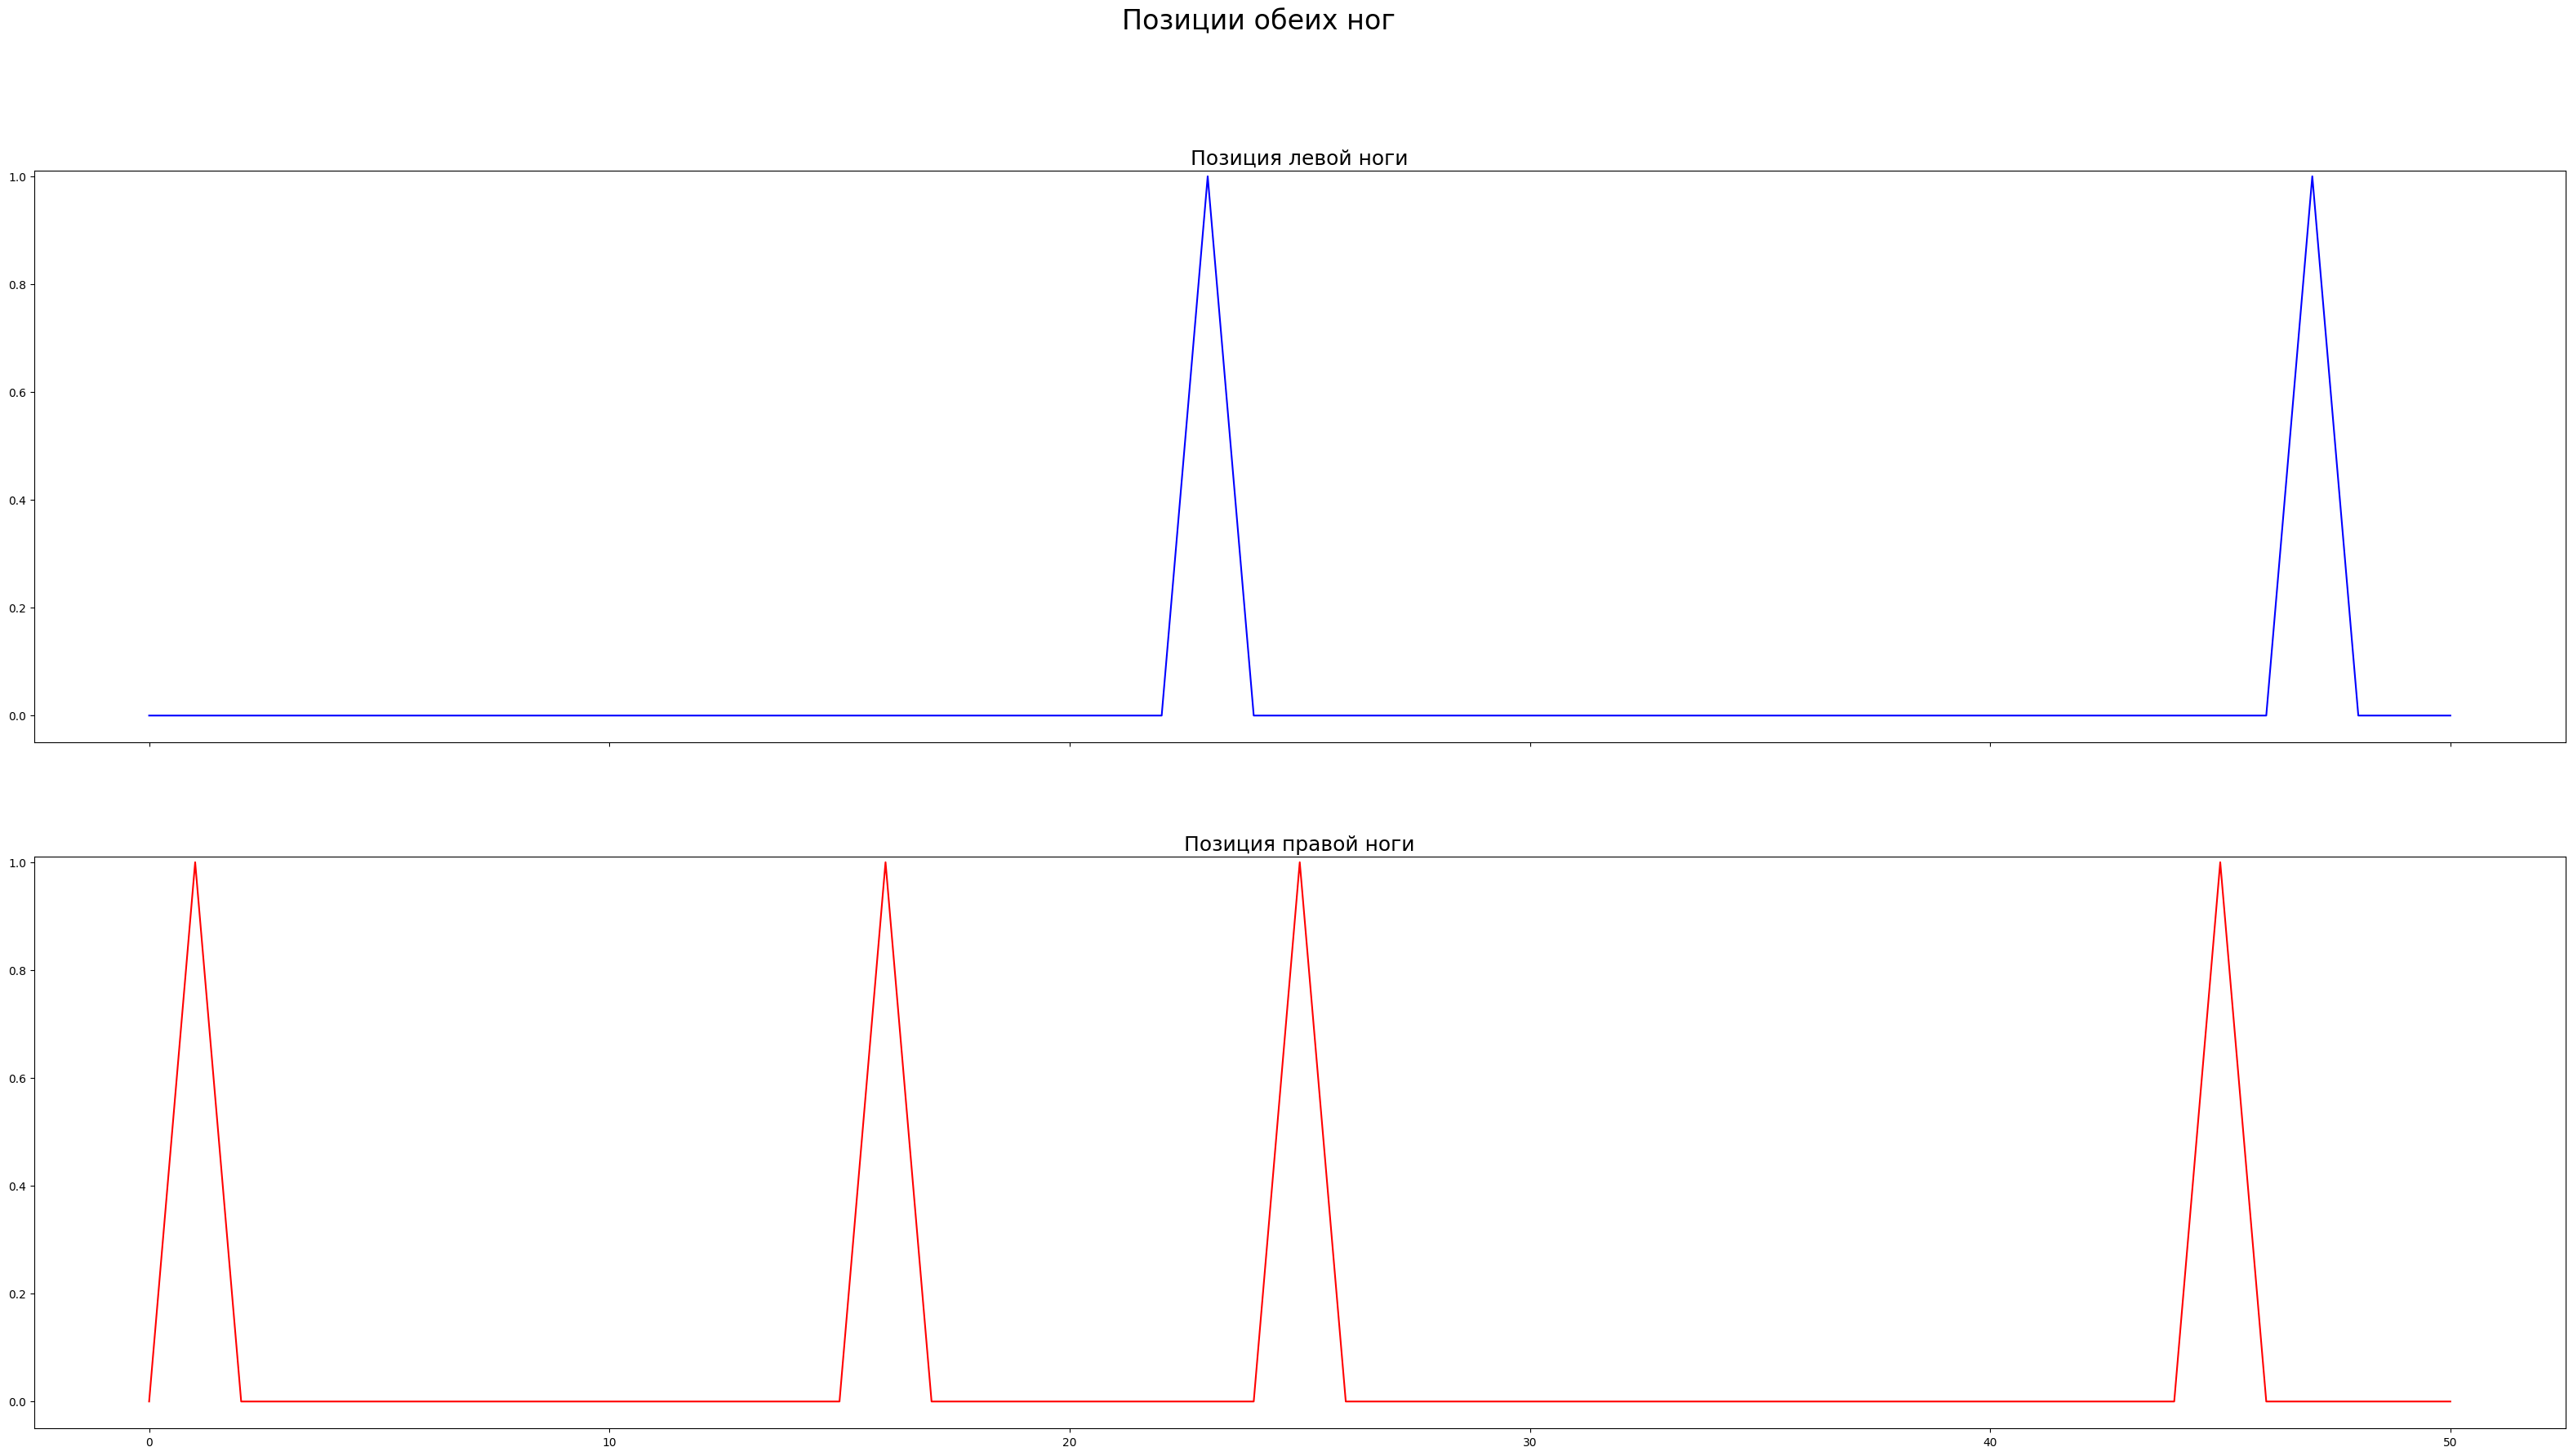

In [27]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(40, 20))
fig.suptitle('Позиции обеих ног', fontsize = 24)
axes[0].plot(left_pos, color='blue')
axes[0].set_title("Позиция левой ноги", fontsize=18)
axes[0].set_ylim(top=1.01)

axes[1].plot(right_pos, color='red')
axes[1].set_title("Позиция правой ноги", fontsize=18)
axes[1].set_ylim(top=1.01)

In [28]:
env = simpy.Environment()
player_tar = Player(env, 1, 2) # env, team, num
env.process(simulation(env, player_tar))
env.run(until=50)

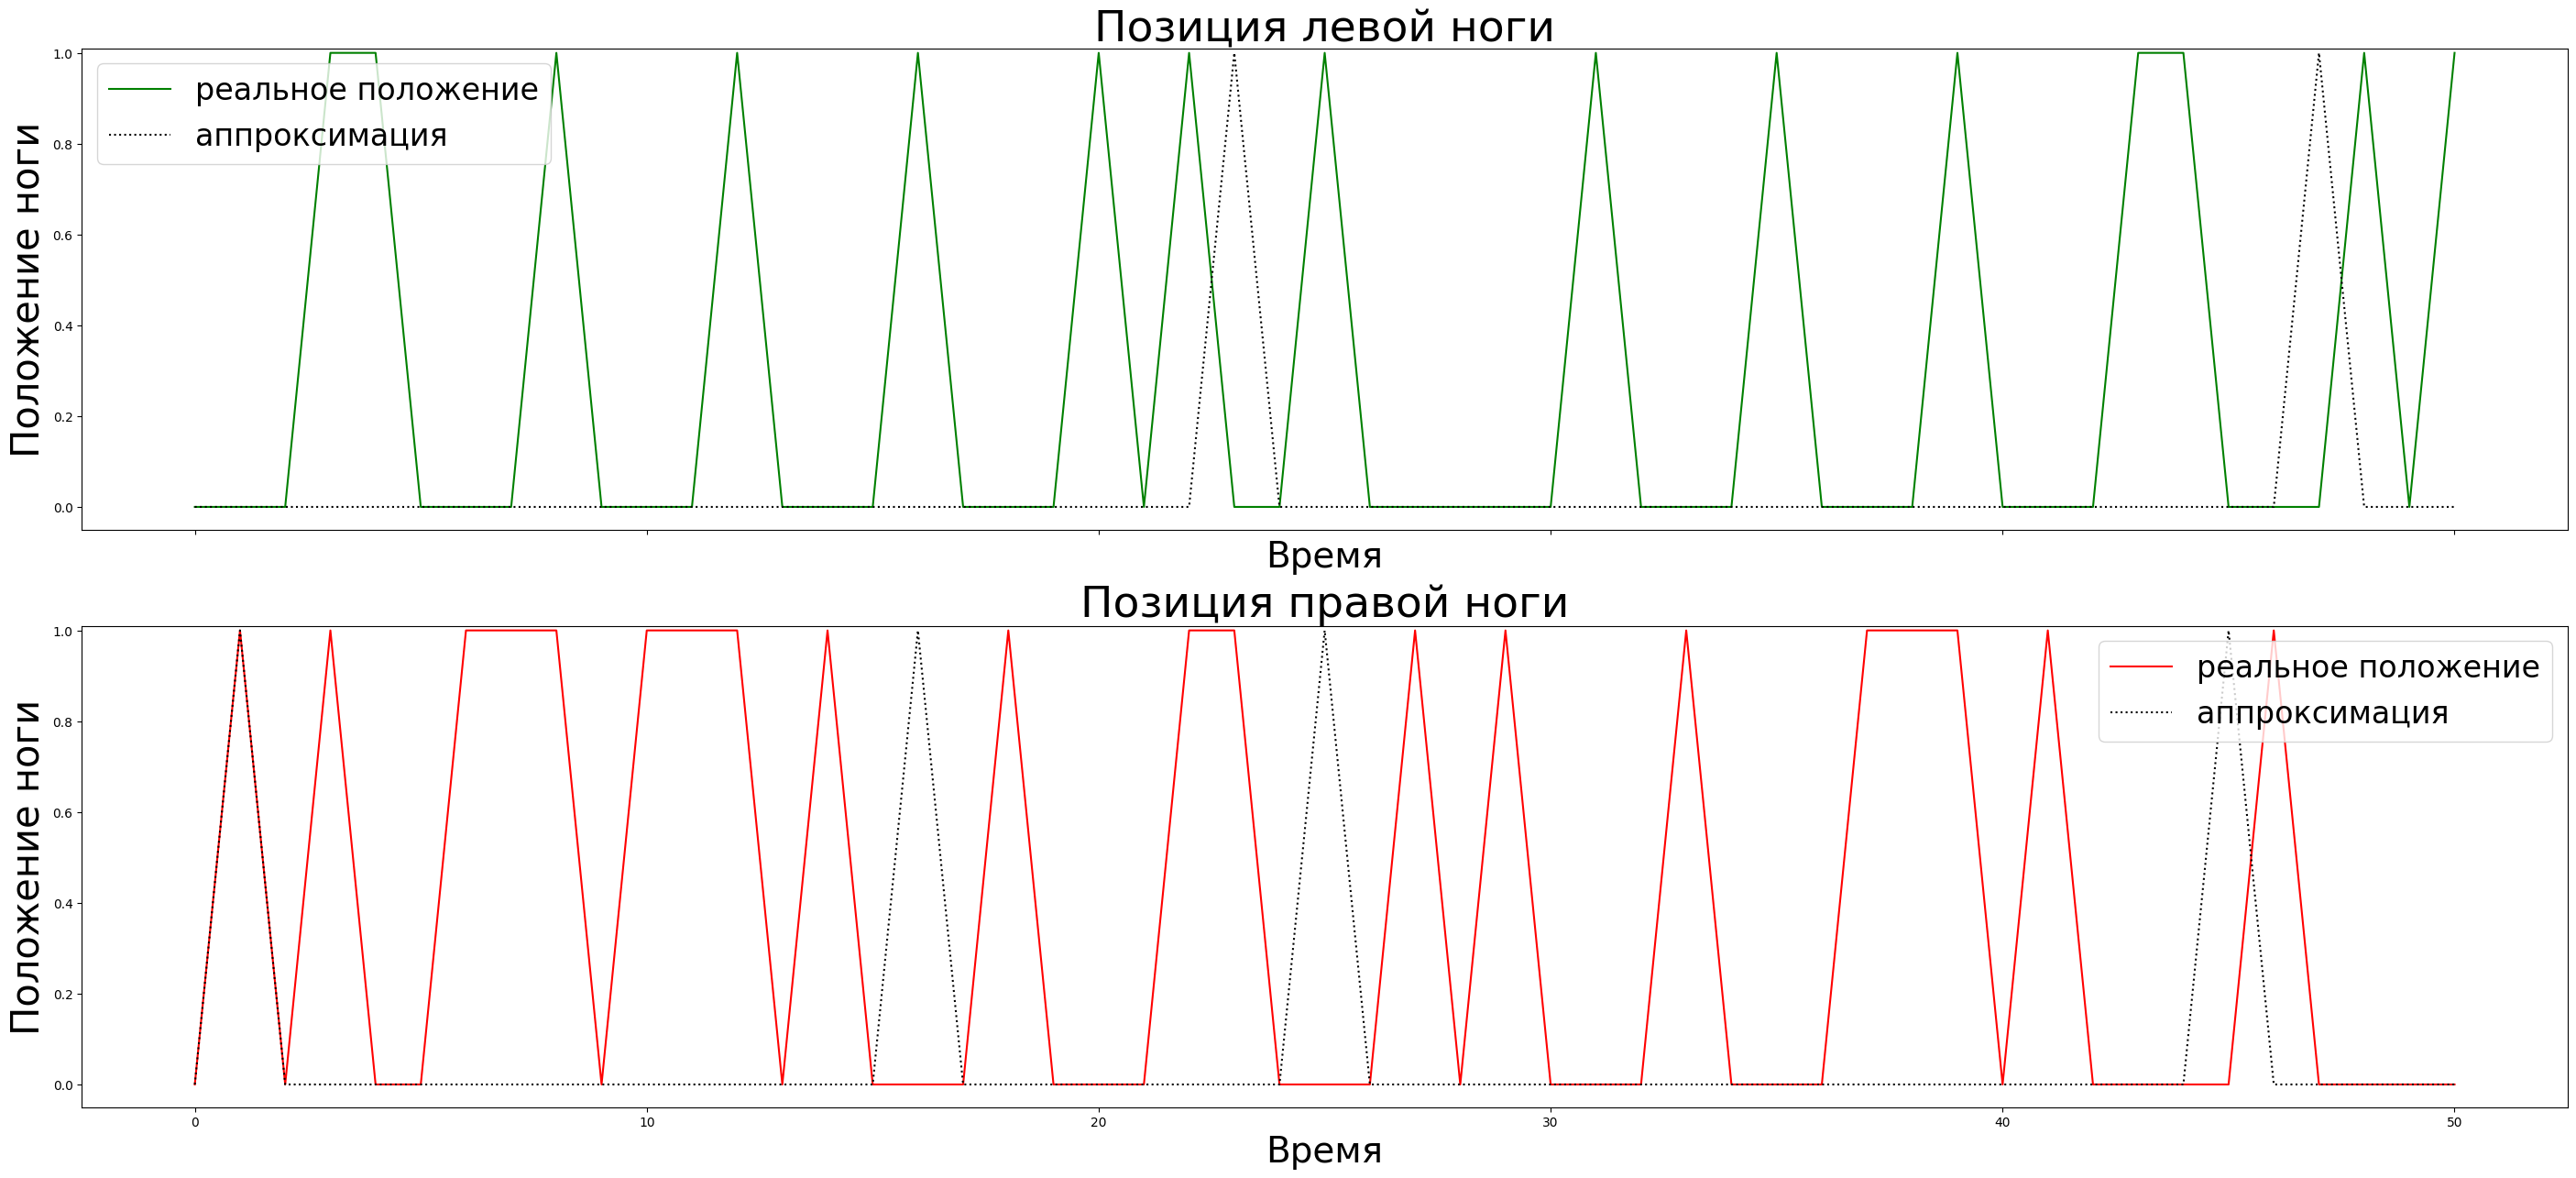

In [37]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(35, 15))
axes[0].plot(player_tar.cond_left, color='green', label="реальное положение")
axes[0].plot(left_pos, ':k', label="аппроксимация")
axes[0].set_title("Позиция левой ноги", fontsize=34)
axes[0].set_ylim(top=1.01)
axes[0].set_xlabel("Время", fontsize=28)
axes[0].set_ylabel("Положение ноги", fontsize=30)
axes[0].legend(fontsize=24)

axes[1].plot(player_tar.cond_right, color='red', label="реальное положение")
axes[1].plot(right_pos, ':k', label="аппроксимация")
axes[1].set_title("Позиция правой ноги", fontsize=34)
axes[1].set_ylim(top=1.01)
axes[1].set_xlabel("Время", fontsize=28)
axes[1].set_ylabel("Положение ноги", fontsize=30)
axes[1].legend(fontsize=24)

plt.savefig('approxstep.png')

**Посмотрим на положение ног на поле**

In [38]:
player = player_tar

In [39]:
net_arr = np.full((PlayGround.width, ), PlayGround.net_pos)
for x in range(len(player.left_x)):
    fig, axes = plt.subplots(figsize=(10, 13))
    
    plt.xlim([0, PlayGround.width])
    plt.ylim([0, PlayGround.length])

    left_x = player.left_x[x]
    left_y = player.left_y[x]
    
    right_x = player.right_x[x]
    right_y = player.right_y[x]
        
    plt.scatter(left_x, left_y, color = 'blue')
    plt.scatter(right_x, right_y, color = 'red')
    plt.plot(net_arr, color = 'black')
    fig.savefig(f'/Users/mariakrylova/Documents/model/for_video/im.%.3d.png' %(x))   # save the figure to file
    plt.close(fig)

### Посмотрим на позиции ног

In [54]:
data_l_x = pd.DataFrame(df_left_x, columns = np.arange(24)).fillna(np.random.randint(1, 250))
data_l_y = pd.DataFrame(df_left_y, columns = np.arange(24)).fillna(np.random.randint(1, 300))
data_r_x = pd.DataFrame(df_right_x, columns = np.arange(24)).fillna(np.random.randint(1, 250))
data_r_y = pd.DataFrame(df_right_y, columns = np.arange(24)).fillna(np.random.randint(1, 300))

In [55]:
cond_left = np.array(player.cond_left)
cond_right = np.array(player.cond_right)
left_x = np.array(player.left_x)
left_y = np.array(player.left_y)
right_x = np.array(player.right_x)
right_y = np.array(player.right_y)

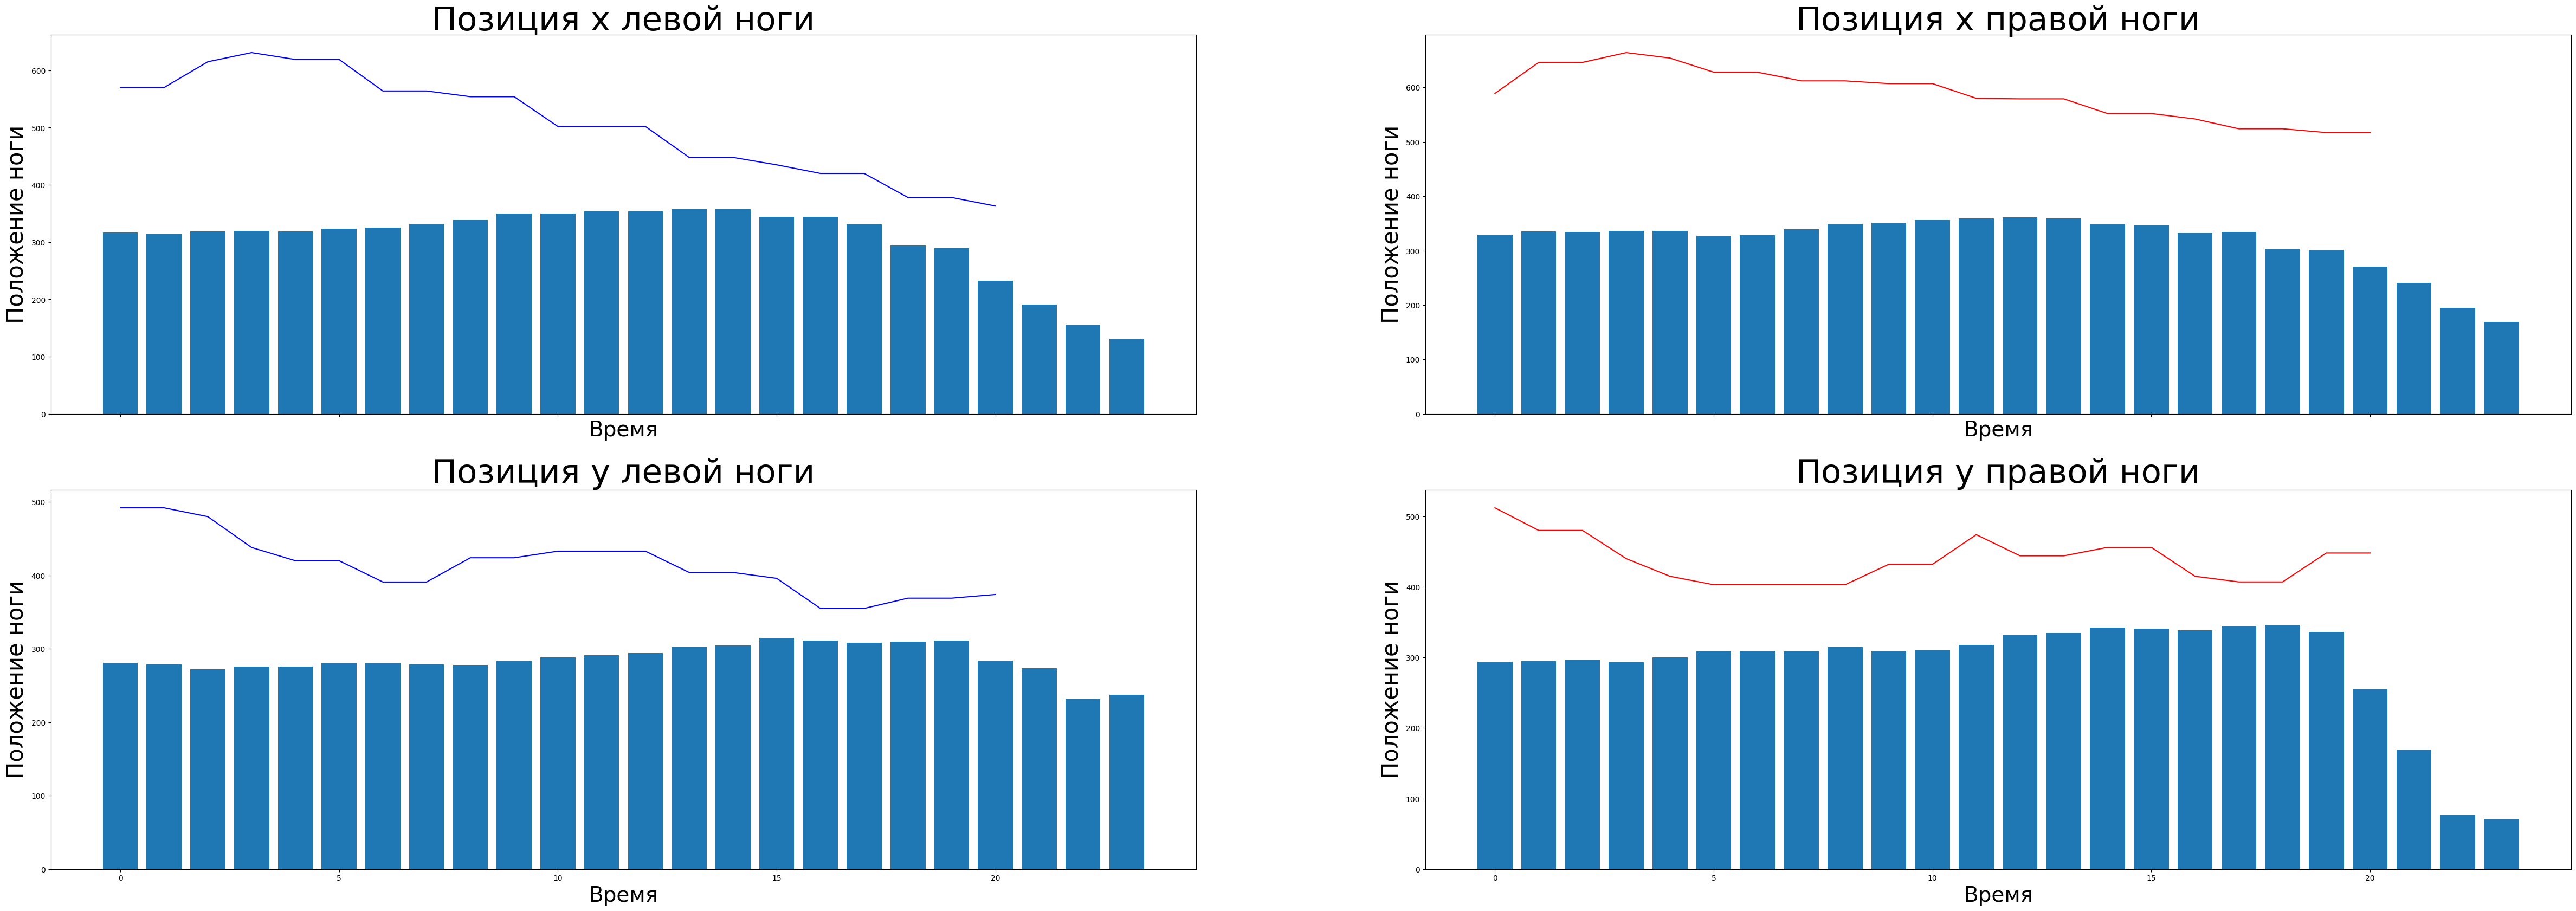

In [61]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(60, 20))
axes[0,0].plot(left_x, color='blue')
axes[0,0].bar(np.arange(len(data_l_x.describe().loc['mean'].tolist())),data_l_x.describe().loc['mean'].tolist())
axes[0,0].set_title("Позиция x левой ноги", fontsize = 44)
axes[0,0].set_xlabel("Время", fontsize=28)
axes[0,0].set_ylabel("Положение ноги", fontsize=30)

axes[1,0].plot(left_y, color='blue')
axes[1,0].bar(np.arange(len(data_l_y.describe().loc['mean'].tolist())),data_l_y.describe().loc['mean'].tolist())
axes[1,0].set_title("Позиция y левой ноги", fontsize = 44)
axes[1,0].set_xlabel("Время", fontsize=28)
axes[1,0].set_ylabel("Положение ноги", fontsize=30)

axes[0,1].plot(right_x, color='red')
axes[0,1].bar(np.arange(len(data_r_x.describe().loc['mean'].tolist())), data_r_x.describe().loc['mean'].tolist())
axes[0,1].set_title("Позиция x правой ноги", fontsize = 44)
axes[0,1].set_xlabel("Время", fontsize=28)
axes[0,1].set_ylabel("Положение ноги", fontsize=30)

axes[1,1].plot(right_y, color='red')
axes[1,1].bar(np.arange(len(data_r_y.describe().loc['mean'].tolist())), data_r_y.describe().loc['mean'].tolist())
axes[1,1].set_title("Позиция y правой ноги", fontsize = 44)
axes[1,1].set_xlabel("Время", fontsize=28)
axes[1,1].set_ylabel("Положение ноги", fontsize=30)

plt.savefig('approx.png')